<a href="https://colab.research.google.com/github/LuciaCelli/Simulation_Edgeworth_Expansion_for_FCNNs/blob/main/Exp_edg_1inp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, norm
from scipy.special import hermitenorm

 Define the value of the inner width of the fully connected neural network (we assume all the inner widths to be equal to $n$) and the number of iteration that we are going to do into the Monte Carlo algorithm to estimate the value of a neural network at $x^{(1)}=1$ (assuming that the neural network $z^{(2)}:\mathbb{R}\to\mathbb{R}$).

In [ ]:
#n_0=1
#x^{(1)}=1
n = 100 # Width
N = 2**18 # Number iteration Monte Carlo
rng = np.random.default_rng(0) # Creates a generator of random numbers of NumPy with fixed seed equal to 0.

 Define the ReLu activation function under the critical parametrization $C_b=0$ (which is the variance of the bias) and $C_W=\sqrt{2}$ (which is the variance of the weights):
$\operatorname{ReLU}(x)=\sqrt{2}\max\{0,x\}$.

In [ ]:
def phi(x):
    return np.sqrt(2.0) * np.maximum(x, 0.0)

 We do the Monte Carlo simulation to compute the value of a fully connected neural network evaluated in $x_0=1$ with depth $L=1$ and inner width $n_1=n$:

$z_1^{(2)}(1) =\frac{1}{\sqrt{n_1}}\sum_{j=1}^{n_1}W^{(2)}_{1,j}\operatorname{ReLU}(z_j^{(1)}(1))$,

where

$z_j^{(1)}(1)=W^{(1)}_{j,1}$

and $W_{i,j}^{(\ell)}\sim\mathcal{N}(0,1)$ for every $\ell=1,2$, $i=1,\dots,n_{\ell}$ and $j=1,\dots,n_{\ell-1}$.

In [ ]:
z =rng.standard_normal(size=(N, n))
W = rng.standard_normal(size=(N, n))
z_prime = np.sum(W * phi(z), axis=1) / np.sqrt(n)

 Approximate the density of the neural network $z^{(2)}(1)$ using the KDE function.


In [ ]:
kde = gaussian_kde(z_prime)

Compute the Hermite polynomials of degree $4,6$ and $8$.

In [ ]:
H4=hermitenorm(4) #x**4 - 6*(x**2) + 3

In [ ]:
H6 = hermitenorm(6) #x**6 - 15*(x**4) + 45*(x**2) - 15

In [ ]:
H8 = hermitenorm(8) #x**8 - 28*(x**6) + 210*(x**4) - 420*(x**2) + 105

 Do a grid of $1000$ points where to compute the density of the neural network, of its Gaussian limit (for $n\to\infty$) and of the Edgeworth expansions of different orders (also called para-Gaussians in Nica and Ortmann (2024)).

In [ ]:
x = np.linspace(-4, 4, 1000)

Compute the values of the approximated density of the neural network in the inputs $x$.

In [ ]:
rho_mc = kde(x)

 Compute the values of the standard density in the inputs $x$. Note that the limiting Gaussian random variable $G^{(2)}(1)$ is a standard Gaussian since its variance is
$K^{(2)}=C_W\mathbb{E}\left[(G^{(1)}(1))^21_{\{G^{(1)}(1)>0\}}\right]=\frac{C_W}{2}\mathbb{E}[(G^{(1)}{(1)})^2]=\frac{C_W}{2}K^{(1)}=\frac{C_W^2}{2}=1$.

In [ ]:
rho_gauss = norm.pdf(x)

We now compute the following Edgeworth expansions (Para-Gaussians) for the neural network:
*   $
y\mapsto \phi_{K^{(2)}}(y)\left(1+\frac{5}{8n_1}H_4\left(\frac{y}{\sqrt{K^{(2)}}}\right)\right),$

*   $y\mapsto \phi_{K^{(2)}}(y)\left(1+\frac{5}{8n_1}H_4\left(\frac{y}{\sqrt{K^{(2)}}}\right)+\frac{11}{12n_1^2}H_6\left(\frac{y}{\sqrt{K^{(2)}}}\right)\right),$


*   $y\mapsto \phi_{K^{(2)}}(y)\left(1+\frac{5}{8n_1}H_4\left(\frac{y}{\sqrt{K^{(2)}}}\right)+\frac{11}{12n_1^2}H_6\left(\frac{y}{\sqrt{K^{(2)}}}\right)+\left(\frac{1573}{192n_1^2}
+\frac{25(n_1-1)}{64n_1^2}\right)H_8\left(\frac{y}{\sqrt{K^{(2)}}}\right)\right).$

We obtained this densities observing that under our assumptions

*   $\mathbb{E}\left[(A^{(2)}-\mathbb{E}[A^{(2)}])^2\right]=\frac{5}{n_1},$
*   $\mathbb{E}\left[(A^{(2)}-\mathbb{E}[A^{(2)}])^3\right]=
\frac{44}{n_1^2},$


*   $\mathbb{E}\left[(A^{(2)}-\mathbb{E}[A^{(2)}])^4\right]=\frac{1573}{n_1^2}
+\frac{75(n_1-1)}{n_1^2}$,

 where

 $A^{(2)}:=C_W(z^{(1)}(1))^21_{\{z^{(1)}>0\}}$,

  and that in general the Egdeworth density in the case of a neural network $z^{(2)}:\mathbb{R}\to\mathbb{R}$ is given by

$
\gamma_{z^{(2)},G^{(2)},m}(x)
=\phi_{K^{(2)}}({x})
+\sum_{k=1}^{2m-1}\frac{1}{k!\,2^k}
\mathbb{E}\!\left[Q^{2k}\right]
H_{2k}\!\left(\sqrt{K^{(2)}})^{-1}{x}\right)
\phi_{K^{(2)}}\!\left({x}\right),\quad{\text{for every $x\in\mathbb{R}$}},
$

with

$
Q:=(\sqrt{K^{(2)}})^{-1}(A^{(2)}-K^{(2)})(\sqrt{K^{(2)}})^{-1}.
$









In [ ]:
# First Para-Gaussian
corr_H4 = 1+(5 / (8*n)) * H4(x)
rho_para_1 = rho_gauss * corr_H4

In [ ]:
# Second Para-Gaussian
corr_H6= 11/ (12*(n**2)) * H6(x)
rho_para_2 = rho_gauss * (corr_H4 + corr_H6)

In [ ]:
# Third Para-Gaussian
corr_H8 = (1573 / (198*n**2) + 25/(128*n)) * H8(x)
rho_para_3 = rho_gauss * (corr_H4+corr_H6+corr_H8)

To ensure that our approximations are densities of a probability measure we take only their positive values.

In [ ]:
rho_para_1 = np.maximum(rho_para_1, 0)
rho_para_2 = np.maximum(rho_para_2, 0)
rho_para_3 = np.maximum(rho_para_3, 0)

We compute the signed pointwise error between the neural network and its Edgeworth expansions.

In [ ]:
err_gauss = rho_gauss - rho_mc
err_para_1  = rho_para_1  - rho_mc
err_para_2 = rho_para_2 - rho_mc
err_para_3 = rho_para_3 - rho_mc

We now plot a figure where we compare the density of the neural network with the density of the limiting Gaussian random variable and with the first three Para-Gaussians. In the second figure we compare the signed pointwise error between the neural network and the approximations already mentioned.

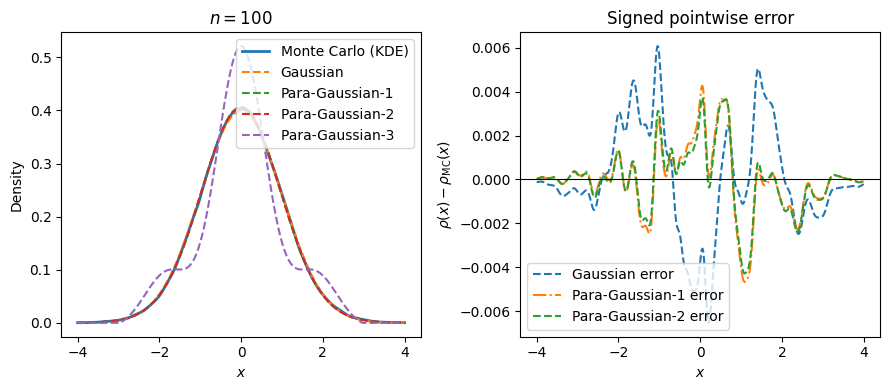

In [ ]:
# ============================================================
# Figure 1: densities + signed errors
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# ---- Left panel: densities
axes[0].plot(x, rho_mc, label="Monte Carlo (KDE)", linewidth=2)
axes[0].plot(x, rho_gauss, "--", label="Gaussian")
axes[0].plot(x, rho_para_1, "--", label="Para-Gaussian-1")
axes[0].plot(x,rho_para_2,"--", label= "Para-Gaussian-2 ")
axes[0].plot(x,rho_para_3,"--", label= "Para-Gaussian-3 ")
axes[0].set_xlabel("$x$")
axes[0].set_ylabel("Density")
axes[0].set_title(r"$n=100$")
axes[0].legend()

# ---- Right panel: signed pointwise error
axes[1].plot(x, err_gauss, "--", label="Gaussian error")
axes[1].plot(x, err_para_1, "-.", label="Para-Gaussian-1 error")
axes[1].plot(x, err_para_2, "--", label="Para-Gaussian-2 error")
#axes[1].plot(x, err_para_3, "-.", label="Para-Gaussian-3 error")
axes[1].axhline(0, color="black", linewidth=0.8)
axes[1].set_xlabel("$x$")
axes[1].set_ylabel(r"$\rho(x)-\rho_{\mathrm{MC}}(x)$")
axes[1].set_title("Signed pointwise error")
axes[1].legend()

plt.tight_layout()
plt.show()

##Comment:

We see that the Edgeworth expansion provides a better approximation than the infinite-width Gaussian limit in the case when the sum over $k$ in the definition of $\gamma_{z^{(2)},G^{(2)},m}$ arrives to $k=2$ and $k=3$ (this last being slightly better than the other). In the case when the sum over $k$ stops at $k=4$ we see that the Edgeworth expansion gives a worse approximation than the others. This is due to the fact that we took $n=100$ and with this number the oscillatory behavior of higher-order Hermite polynomials in the expansion predominate. These deviations are consistent with the known limitations of Edgeworth expansions at moderate sample sizes.

## References:



*   L. Celli. Optimal Non-Asymptotic Edgeworth Expansions for Multivariate Neural Network Outputs. *In preparation*.
*   M. Nica and J. Ortmann. Improving the gaussian approximation in neural networks: Para-gaussians and edgeworth expansions. In *NeurIPS 2024 Workshop on Mathematics of Modern Machine Learning*, 2024.

